In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import random
plt.figure(figsize=(20,15))

<Figure size 2000x1500 with 0 Axes>

In [235]:
data = pd.read_csv('dataset_1.csv')
data= data.drop(columns='Unnamed: 0')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data=scaler.fit_transform(data)
data= np.round(data,3)
# data.info()
data

array([[ 1.14 , -0.945],
       [ 2.105, -0.437],
       [ 0.417, -1.295],
       ...,
       [-0.879,  0.978],
       [-0.619,  1.004],
       [-1.168,  0.363]])

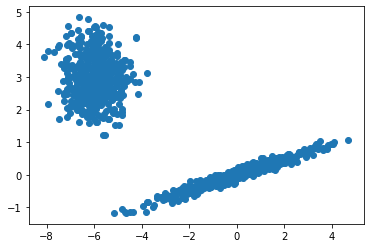

In [3]:
plt.scatter(data["normalized_age"], data["normalized_salary"])

In [196]:
data=np.array(data)
def start_kmeans(k, df):
    centroids ={}
    for i in range(k):
        centroids[i] = data[i]
     
    return centroids



In [202]:
def assign_clusters(centroids, data,k):
    clusters = {}
    for i in range(k):
         clusters[i]= []
        
    for row in data:
        distances = [np.linalg.norm(row-centroids[centroid]) for centroid in centroids]
        
        cluster = [key for key, value in enumerate(distances) if value==min(distances)][0]
        
        clusters[cluster].append(row)
        
    return clusters


In [54]:
def new_centroids (clusters):
    for cluster in clusters:
                centroids[cluster] = np.average(clusters[cluster],axis=0)
            
    return centroids



In [83]:
def run_kmeans (k,df, max_iter):
    centroids = start_kmeans(k, df)
    clusters = assign_clusters(centroids, data,k)
    all_centroids= {}
    
    for iteration in range(0, max_iter):
        
        centroids = new_centroids(clusters)
        all_centroids[iteration]= centroids
        clusters = assign_clusters(centroids, data,k)
    
        
    return clusters





In [268]:
class Kmeans ():
    
    def __init__(self, data, k, max_iter):
            self.data = data
            self.k = k
            self.max_iter = max_iter
            self.clusters = {}
            
    
    def start_kmeans(self):
        
        self.centroids = {}
        
        
        for i in range(self.k):
            
            self.centroids[i] = self.data[i] 
     
        return self.centroids
    
    def assign_clusters(self, centroids):
        
        self.ykmeans=[]
        
        for i in range(self.k):
             self.clusters[i]= []
             
        
        for row in data:
            distances = [np.linalg.norm(row-self.centroids[centroid]) for centroid in self.centroids]
        
            cluster = [key for key, value in enumerate(distances) if value==min(distances)][0]
            
            self.ykmeans.append(cluster)
            self.clusters[cluster].append(row)
        
        return self.clusters, self.ykmeans
  
    def new_centroids (self, clusters):
        self.centroids = {}
        for cluster in self.clusters:
                self.centroids[cluster] = np.average(self.clusters[cluster],axis=0)
            
        return self.centroids
    
    
    def run_kmeans (self):
    
        self.centroids = self.start_kmeans()
        self.clusters, self.ykmeans = self.assign_clusters(self.centroids)
#         all_centroids= {}

        for iteration in range(0, self.max_iter):

            self.centroids = new_centroids(self.clusters)
    #         all_centroids[iteration]= centroids
            self.clusters, self.ykmeans = self.assign_clusters(self.centroids)

        
        return self.clusters, self.ykmeans

    def plot (self):
        
        plt.scatter(self.data[:, 0], self.data[:, 1], c=self.ykmeans, s=50,)

        
        plt.scatter(np.array(list(self.centroids.values()))[:, 0], np.array(list(self.centroids.values()))[:, 1], c='black', s=200, alpha=0.5);
        
    
    


In [271]:
kmeans= Kmeans(data, 3, 100)

# kmeans.run_kmeans()

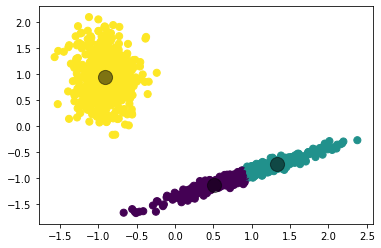

In [270]:
kmeans.plot()
# 